# Part 1

Does true negative matter for both the ROC and PR curve? Argue why each point on the ROC curve
corresponds to a unique point on the PR curve.

The true negative matters for the ROC curve however it does not matter for the PR curve.
**Reason:**
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

$$
\text{True Positive Rate} = \frac{TP}{TP + FN}
$$

$$
\text{False Positive Rate} = \frac{FP}{FP + TN}
$$

We see that in both recall and precision formulas we do not utilize TN to calculate them. However, in the false positive rate we use True Negative to calculate the formula.
**Conclusion:** The true negative matters for the ROC curve however it does not matter for the PR curve.

**Hypothesis:** There is a one to one corespondence from each point on the ROC curve to each point on the PR curve for a given dataset of positive and negative examples

**Proof:**

Case 1:$\Rightarrow$

As for each value of TPR and FPR we are utilising 4 variables, and we also have the equation that TP+TN+FP+FN = 1 and we have a given dataset of positive and nevative examples, we can calculate all the 4 variables and easily compute the **PR**

case 2: $⇐$
Similarly, we have 3 variables with 2 equations, however given that we gave a predefined dataset of positive and negative examples we can find the TP, FP, FN, TN and then calculate the **ROC**

Conclusion: there is a one to one correspondence between poitns from the ROC and PR


In [1]:
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 47.4 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=4cf3a7998214ad6c3c130193c7c0c9a8f2a9d1835195caaef9c69e846495d87e
  Stored in directory: /root/.cache/pip/wheels/a9/ac/cf/c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff


In [10]:
import openml

# Fetch the dataset using its ID
dataset = openml.datasets.get_dataset(31)

# Get the features and target variable
X, y, categorical_indicator, attribute_names = dataset.get_data(
    dataset_format='dataframe',
    target=dataset.default_target_attribute
)

print(X.head())


print("Successfully loaded dataset and extracted X and y.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

  checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv         1169.0  no known savings        >=7   
1             radio/tv         5951.0              <100     1<=X<4   
2            education         2096.0              <100     4<=X<7   
3  furniture/equipment         7882.0              <100     4<=X<7   
4              new car         4870.0              <100     1<=X<4   

   installment_commitment     personal_status other_parties  residence_since  \
0                       4         male single          none                4   
1                       2  female div/de

In [14]:
import pandas as pd

# Select only numerical columns from X
X_numerical = X.select_dtypes(include=['number'])

print("Shape of X_numerical:", X_numerical.shape)
display(X_numerical.head())

Shape of X_numerical: (1000, 7)


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,6,1169.0,4,4,67,2,1
1,48,5951.0,2,2,22,1,1
2,12,2096.0,2,3,49,1,2
3,42,7882.0,2,4,45,1,2
4,24,4870.0,3,4,53,2,2


In [15]:
# Split train test data
from sklearn.model_selection import train_test_split
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(X_numerical, y, test_size = 0.2, random_state=42)

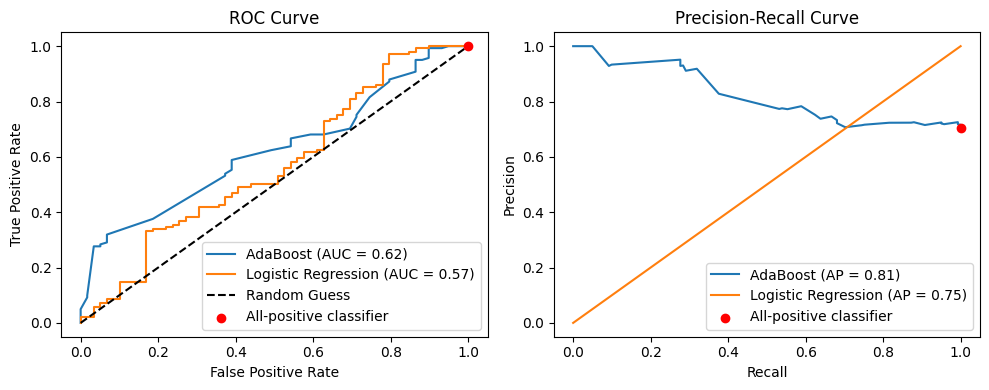

In [24]:
# Perform the adabost and logistic regression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import pandas as pd


# Convert target variable to numerical labels
y_train_numeric = y_train.apply(lambda x: 1 if x == 'good' else 0)
y_test_numeric = y_test.apply(lambda x: 1 if x == 'good' else 0)


# Train the binary classification models
ada = AdaBoostClassifier()
ada.fit(X_train, y_train_numeric)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train_numeric)

# Get the predictive probabilites for the positive class
ada_probs = ada.predict_proba(X_test)[:, 1]
logreg_probs = logreg.predict_proba(X_test)[:, 1]

# 3. ROC Curve data
fpr_ada, tpr_ada, _ = roc_curve(y_test_numeric, ada_probs)
fpr_log, tpr_log, _ = roc_curve(y_test_numeric, logreg_probs)
roc_auc_ada = auc(fpr_ada, tpr_ada)
roc_auc_log = auc(fpr_log, tpr_log)


# 4. Precision-Recall Curve data
prec_ada, rec_ada, _ = precision_recall_curve(y_test_numeric, ada_probs)
prec_log, rec_log, _ = precision_recall_curve(y_test_numeric, logreg_probs)
avg_prec_ada = average_precision_score(y_test_numeric, ada_probs)
avg_prec_log = average_precision_score(y_test_numeric, logreg_probs)

# 5. Plot ROC Curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.scatter(1.0, 1.0, color='red', zorder=5, label='All-positive classifier')
plt.legend()

# 6. Plot Precision-Recall Curves
plt.subplot(1, 2, 2)
plt.plot(rec_ada, prec_ada, label=f'AdaBoost (AP = {avg_prec_ada:.2f})')
plt.plot(rec_log, rec_log, label=f'Logistic Regression (AP = {avg_prec_log:.2f})')
positive_rate = sum(y_test_numeric) / len(y_test_numeric)
plt.scatter(1.0, positive_rate, color='red', zorder=5, label='All-positive classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()



plt.tight_layout()
plt.show()